In [1]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [2]:
from scipy import stats

In [3]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
PATH = 'data/'
df_fox = pd.DataFrame(columns=['quotation'])
df_ny = pd.DataFrame(columns=['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [4]:
df_fox

,quotation
190,"a good, strong, honorable man."
555,I don't know any other way he could have taken...
594,Alcohol interlocks are used very effectively i...
643,"I don't think, in effect, Obama was negotiatin..."
771,"I felt like a hole in my heart had been filled,"
...,...
5243875,"They've known each other for over 35 years, an..."
5243940,"This time, the best thing is to ring her, vide..."
5243947,This was their first day of school and they sh...
5244043,was aimed at deterring future Iranian attack p...


In [5]:
#The chosen key words are selected here
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|violen|death'
words_ClimateChange = 'flood|greenhouse effect|CO2|global warming|pollution|glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'God|Christian|Christianism|Belief|faith|prayer|commitment|islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'White|Black|Black lives matter|All lives matter|discrimination|Segregation|George Floyd|Slaver|White supremacy|Klu Klux Klan|KKK|Gunshot|Trials|Police|Death sentence'

In [6]:
sia = SentimentIntensityAnalyzer()
from collections import namedtuple

## Immigration

In [7]:
df_immi_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_immigration]
lista2 = ['immigration']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_immi_n = df_immi_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_immi_n = df_immi_n.append(newr, ignore_index=True)
    
    


df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_immi_n = df_immi_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_immi_n = df_immi_n.append(newr, ignore_index=True)
    

In [8]:
res = stats.ttest_ind(df_immi_n[df_immi_n['journal']=="foxnews"][df_immi_n['emotion']=="positive"]['value'],
                      df_immi_n[df_immi_n['journal']=="nytimes"][df_immi_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_immi_n[df_immi_n['journal']=="foxnews"][df_immi_n['emotion']=="negative"]['value'],
                       df_immi_n[df_immi_n['journal']=="nytimes"][df_immi_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=2.5850595850130467, pvalue=0.009746629473109369)
Ttest_indResult(statistic=3.4538982768435593, pvalue=0.000554245735632421)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


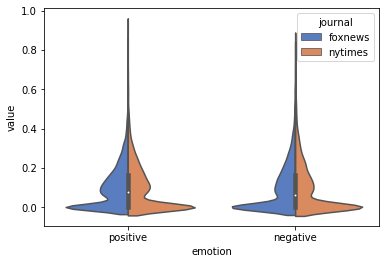

In [9]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_immi_n, palette="muted", split=True)

In [10]:
a = df_immi_n[df_immi_n['journal']=="foxnews"][df_immi_n['emotion']=="positive"]['value'].mean()
b = df_immi_n[df_immi_n['journal']=="nytimes"][df_immi_n['emotion']=="positive"]['value'].mean()
c = df_immi_n[df_immi_n['journal']=="foxnews"][df_immi_n['emotion']=="negative"]['value'].mean()
d = df_immi_n[df_immi_n['journal']=="nytimes"][df_immi_n['emotion']=="negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

0.10223149378094464
0.09716091732511083
0.10182441734090107
0.09439680092503351


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [11]:
lst = [df_immi_n]
del lst     

## Terrorism

In [12]:
df_te_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_terrorism]
lista2 = ['terrorism']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_te_n = df_te_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_te_n = df_te_n.append(newr, ignore_index=True)
    
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_te_n = df_te_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_te_n = df_te_n.append(newr, ignore_index=True)
    

In [13]:
res = stats.ttest_ind(df_te_n[df_te_n['journal']=="foxnews"][df_te_n['emotion']=="positive"]['value'],
                      df_te_n[df_te_n['journal']=="nytimes"][df_te_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_te_n[df_te_n['journal']=="foxnews"][df_te_n['emotion']=="negative"]['value'],
                       df_te_n[df_te_n['journal']=="nytimes"][df_te_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=-7.474035785153604, pvalue=7.864494703712389e-14)
Ttest_indResult(statistic=3.9333214513927253, pvalue=8.385817936956226e-05)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


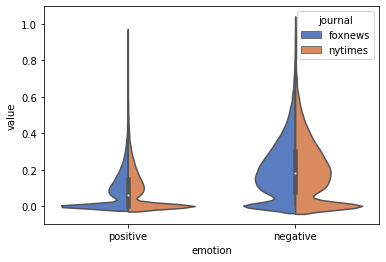

In [14]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_te_n, palette="muted", split=True)

In [15]:
a = df_te_n[df_te_n['journal']=="foxnews"][df_te_n['emotion']=="positive"]['value'].mean()
b = df_te_n[df_te_n['journal']=="nytimes"][df_te_n['emotion']=="positive"]['value'].mean()
c = df_te_n[df_te_n['journal']=="foxnews"][df_te_n['emotion']=="negative"]['value'].mean()
d = df_te_n[df_te_n['journal']=="nytimes"][df_te_n['emotion']=="negative"]['value'].mean()

print(a)
print(b)
print(c)
print(d)

0.0889700900012332
0.09517736454596941
0.20444887190235428
0.1996164810269968


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [16]:
lst = [df_te_n]
del lst     

## Climate change

In [17]:
df_cc_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_ClimateChange]
lista2 = ['climate change']

df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_cc_n = df_cc_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_cc_n = df_cc_n.append(newr, ignore_index=True)
    
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
   
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_cc_n = df_cc_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_cc_n = df_cc_n.append(newr, ignore_index=True)

In [18]:
res = stats.ttest_ind(df_cc_n[df_cc_n['journal']=="foxnews"][df_cc_n['emotion']=="positive"]['value'],
                      df_cc_n[df_cc_n['journal']=="nytimes"][df_cc_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_cc_n[df_cc_n['journal']=="foxnews"][df_cc_n['emotion']=="negative"]['value'],
                       df_cc_n[df_cc_n['journal']=="nytimes"][df_cc_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=-0.8640132745111244, pvalue=0.3876140820575109)
Ttest_indResult(statistic=5.636352088715872, pvalue=1.8134996597442932e-08)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


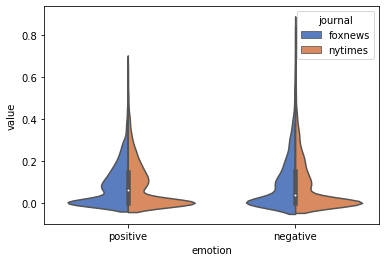

In [19]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_cc_n, palette="muted", split=True)

In [20]:
a = df_cc_n[df_cc_n['journal']=="foxnews"][df_cc_n['emotion']=="positive"]['value'].mean()
b = df_cc_n[df_cc_n['journal']=="nytimes"][df_cc_n['emotion']=="positive"]['value'].mean()
c = df_cc_n[df_cc_n['journal']=="foxnews"][df_cc_n['emotion']=="negative"]['value'].mean()
d = df_cc_n[df_cc_n['journal']=="nytimes"][df_cc_n['emotion']=="negative"]['value'].mean()

print(a)
print(b)
print(c)
print(d)

0.08748870481927716
0.08986647807637906
0.10263742469879525
0.08456181046676103


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [21]:
lst = [df_cc_n]
del lst     

## Abortion

In [22]:
df_ab_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_abortion]
lista2 = ['abortion']

df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_ab_n = df_ab_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_ab_n = df_ab_n.append(newr, ignore_index=True)
    
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
   
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_ab_n = df_ab_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_ab_n = df_ab_n.append(newr, ignore_index=True)

In [23]:
res = stats.ttest_ind(df_ab_n[df_ab_n['journal']=="foxnews"][df_ab_n['emotion']=="positive"]['value'],
                      df_ab_n[df_ab_n['journal']=="nytimes"][df_ab_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_ab_n[df_ab_n['journal']=="foxnews"][df_ab_n['emotion']=="negative"]['value'],
                       df_ab_n[df_ab_n['journal']=="nytimes"][df_ab_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=0.6986354018016663, pvalue=0.4848666942711134)
Ttest_indResult(statistic=0.36941612315318134, pvalue=0.7118593632830178)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


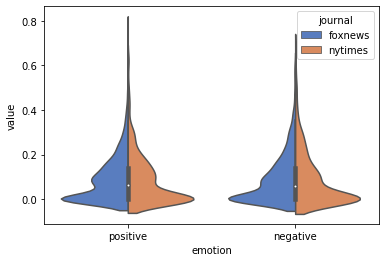

In [24]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_ab_n, palette="muted", split=True)

In [25]:
a = df_ab_n[df_ab_n['journal']=="foxnews"][df_ab_n['emotion']=="positive"]['value'].mean()
b = df_ab_n[df_ab_n['journal']=="nytimes"][df_ab_n['emotion']=="positive"]['value'].mean()
c = df_ab_n[df_ab_n['journal']=="foxnews"][df_ab_n['emotion']=="negative"]['value'].mean()
d = df_ab_n[df_ab_n['journal']=="nytimes"][df_ab_n['emotion']=="negative"]['value'].mean()

print(a)
print(b)
print(c)
print(d)

0.08926307053941905
0.08568609865470851
0.0905170124481327
0.08849925261584454


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [26]:
lst = [df_ab_n]
del lst  

## Religion

In [27]:
df_re_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_religion]
lista2 = ['religion']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_re_n = df_re_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_re_n = df_re_n.append(newr, ignore_index=True)
    
    


df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_re_n = df_re_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_re_n = df_re_n.append(newr, ignore_index=True)

In [28]:
res = stats.ttest_ind(df_re_n[df_re_n['journal']=="foxnews"][df_re_n['emotion']=="positive"]['value'],
                      df_re_n[df_re_n['journal']=="nytimes"][df_re_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_re_n[df_re_n['journal']=="foxnews"][df_re_n['emotion']=="negative"]['value'],
                       df_re_n[df_re_n['journal']=="nytimes"][df_re_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=-1.7869765933125543, pvalue=0.073955491262472)
Ttest_indResult(statistic=3.178817465267723, pvalue=0.001480886944706806)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


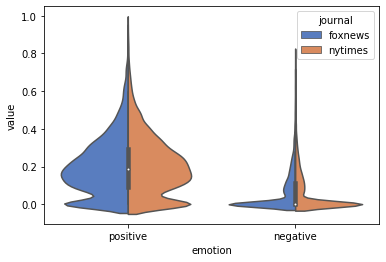

In [29]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_re_n, palette="muted", split=True)

In [30]:
a = df_re_n[df_re_n['journal']=="foxnews"][df_re_n['emotion']=="positive"]['value'].mean()
b = df_re_n[df_re_n['journal']=="nytimes"][df_re_n['emotion']=="positive"]['value'].mean()
c = df_re_n[df_re_n['journal']=="foxnews"][df_re_n['emotion']=="negative"]['value'].mean()
d = df_re_n[df_re_n['journal']=="nytimes"][df_re_n['emotion']=="negative"]['value'].mean()

print(a)
print(b)
print(c)
print(d)

0.20197896704837623
0.20585270126492541
0.06863753213367599
0.0640956377822437


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [31]:
lst = [df_re_n]
del lst  

## Racism

In [37]:
df_ra_n = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_racism]
lista2 = ['racism']

df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    df_ra_n = df_ra_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    df_ra_n = df_ra_n.append(newr, ignore_index=True)
    
    


df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    
    result=sia.polarity_scores(quotation)
    pos=result["pos"]
    neg=result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    df_ra_n = df_ra_n.append(newr, ignore_index=True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    df_ra_n = df_ra_n.append(newr, ignore_index=True)

In [38]:
res = stats.ttest_ind(df_ra_n[df_ra_n['journal']=="foxnews"][df_ra_n['emotion']=="positive"]['value'],
                      df_ra_n[df_ra_n['journal']=="nytimes"][df_ra_n['emotion']=="positive"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_ra_n[df_ra_n['journal']=="foxnews"][df_ra_n['emotion']=="negative"]['value'],
                       df_ra_n[df_ra_n['journal']=="nytimes"][df_ra_n['emotion']=="negative"]['value'],equal_var=True) 
print(res)
print(res2)

Ttest_indResult(statistic=0.7233978379471638, pvalue=0.46944978012100336)
Ttest_indResult(statistic=2.1283955705663513, pvalue=0.03332487587571053)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


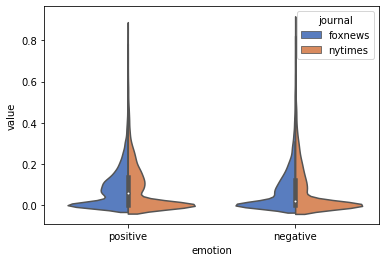

In [39]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_ra_n, palette="muted", split=True)

In [42]:
a = df_ra_n[df_ra_n['journal']=="foxnews"][df_ra_n['emotion']=="positive"]['value'].mean()
b = df_ra_n[df_ra_n['journal']=="nytimes"][df_ra_n['emotion']=="positive"]['value'].mean()
c = df_ra_n[df_ra_n['journal']=="foxnews"][df_ra_n['emotion']=="negative"]['value'].mean()
d = df_ra_n[df_ra_n['journal']=="nytimes"][df_ra_n['emotion']=="negative"]['value'].mean()

print("fox positive {0}".format(a))
print(b)
print(c)
print(d)

fox positive 0.08558292978208229
0.08419019458222071
0.0791047215496366
0.07474418161007261


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
lst = [df_ra_n]
del lst  